<Axes: >

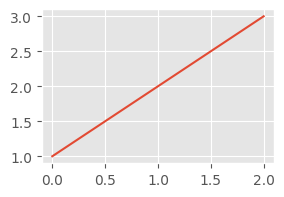

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))
 

# 데이타 불러오기

In [85]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
print(iris.keys())
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
print(feature_name)
# 종속변수
target = iris.target
target_name = iris.target_names
print(target_name)
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

# 데이터 시각화

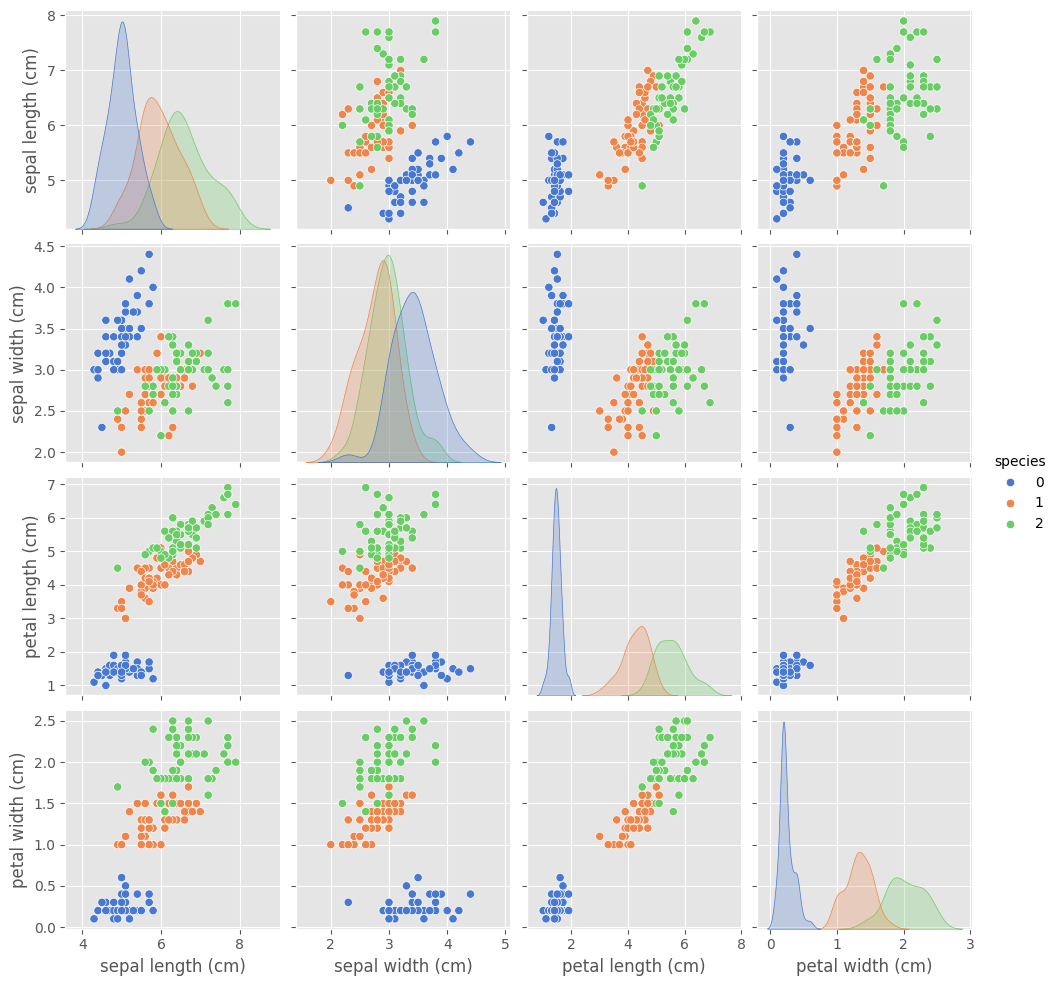

In [87]:
sns.pairplot(data=df_iris, hue='species',palette='muted');

In [88]:
X = feature #x를 독립
y= target #y를 종속

#데이터 분할
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y) #y를 기준으로 값을 동일하게 분할 (stratify)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((112, 4), (38, 4), (112,), (38,))

In [89]:
pd.Series(y_train).value_counts()

0    38
1    37
2    37
Name: count, dtype: int64

# 모델 생성 및 훈련 

In [90]:
#모델 생성
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train) #모델 훈련련

DecisionTreeClassifier()

# 모델 평가 

In [91]:
pred = model.predict(X_test)
print(f'예측: {pred}')
print(f'실제: {y_test}')

#평가
from sklearn.metrics import accuracy_score, precision_score, classification_report
accuracy_score(y_test, pred) #정확도 , 값 입력(실제 값, 예측 값)
print(f'예측정확도 >>>> {accuracy_score(y_test, pred)}')
print(classification_report(y_test,pred))

예측: [0 0 1 2 2 1 2 1 1 0 1 2 1 0 2 1 0 0 0 2 1 0 2 0 1 2 1 2 2 1 0 2 1 2 1 0 0
 1]
실제: [0 0 1 2 2 1 2 1 1 0 1 2 1 0 2 1 0 0 0 2 2 0 2 0 1 2 1 2 2 1 0 2 1 2 1 0 0
 1]
예측정확도 >>>> 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



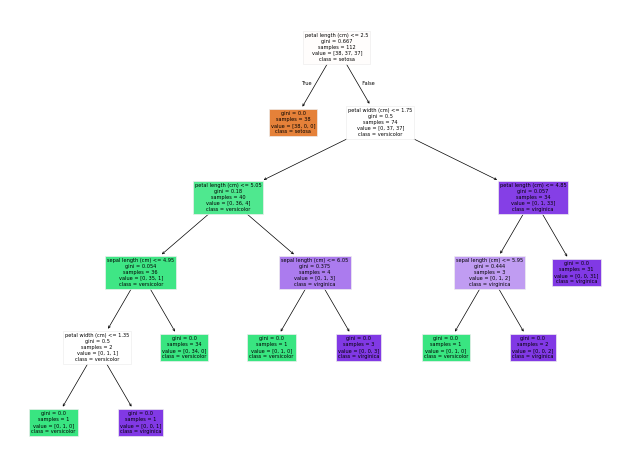

In [92]:
#트리 시각화
from sklearn.tree import plot_tree
plot_tree(model, feature_names = feature_name,
          class_names=target_name,
          filled= True)
plt.tight_layout();

특성의 중요도 : [0.05059927 0.         0.56286781 0.38653292]


<Axes: >

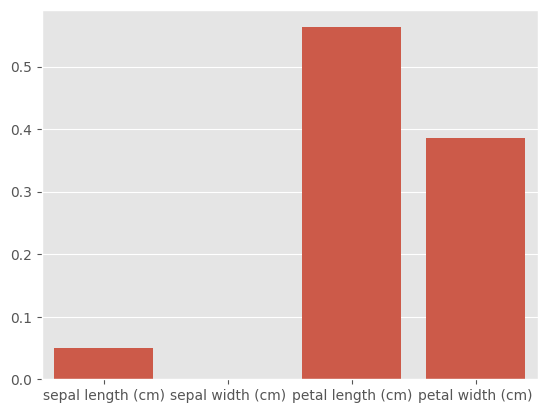

In [93]:
#특성의 중요도
print(f'특성의 중요도 : {model.feature_importances_}')
sns.barplot(x=feature_name,y =model.feature_importances_)

In [94]:
model.get_depth()

5

# 교차 검증 

In [95]:
from sklearn.model_selection import StratifiedKFold # StratifiedKFold 교차검증 = 층화추출
skf = StratifiedKFold(n_splits=5, shuffle=True) # 5겹 층화추출 교차검증

#for tr_index, val_index in skf.split(X_train, y_train):
#    print(f'tr_inx:{tr_index}')
#    print(f'val_index:{val_index}') # 교차검증 데이터셋 확인

cv_scores = [] # 교차검증 정확도 리스트

for tr_index, val_index in skf.split(X_train, y_train):
    X_tr, y_tr = X_train[tr_index], y_train[tr_index] # 학습용 데이터셋
    X_val, y_val = X_train[val_index], y_train[val_index] # 검증용 데이터셋


    model.fit(X_tr, y_tr) # 모델 훈련
    pred = model.predict(X_val) # 검증용 데이터셋으로 예측
    print(f'정확도 >>>', {accuracy_score(y_val, pred)}) # 정확도 계산
    cv_scores.append(accuracy_score(y_val, pred)) # 정확도 리스트에 추가

정확도 >>> {1.0}
정확도 >>> {0.9130434782608695}
정확도 >>> {0.9545454545454546}
정확도 >>> {0.9545454545454546}
정확도 >>> {0.9545454545454546}


In [96]:
pred=model.predict(X_test)
print(accuracy_score(y_test,pred))

0.9473684210526315


# 규제(?) 과적합 방지 

In [99]:
# 하이퍼파라미터 준비
model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits= 5, shuffle= True)
parameters = {'max_depth':[3,4,5],
            'min_samples_split':[2,4]
}

#GridSearchCV 객체 생성
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(model, param_grid=parameters, cv = kf, refit = True) #model을 사용하고 parameter기준으로
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

In [103]:
#그리드서치 결과 확인
display(pd.DataFrame(gscv.cv_results_))
print(f'최적의 파라미터: {gscv.best_params_}')
print(f'최고의 정확도: {gscv.best_score_}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001401,0.000904,0.000279,0.000559,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.956522,0.956522,0.954545,0.909091,0.954545,0.946245,0.018598,1
1,0.001139,0.000173,0.000511,0.000446,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.956522,0.956522,0.954545,0.909091,0.954545,0.946245,0.018598,1
2,0.000199,0.000399,0.001053,0.000555,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.956522,0.956522,0.909091,0.909091,0.954545,0.937154,0.022925,4
3,0.000724,0.000614,0.000221,0.000442,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.956522,0.956522,0.909091,0.909091,0.954545,0.937154,0.022925,4
4,0.000504,0.000632,0.000200,0.000399,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.956522,0.956522,0.954545,0.909091,0.954545,0.946245,0.018598,1
5,0.000767,0.000641,0.000417,0.000512,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.956522,0.956522,0.909091,0.909091,0.954545,0.937154,0.022925,4


최적의 파라미터: {'max_depth': 3, 'min_samples_split': 2}
최고의 정확도: 0.9462450592885375


In [104]:
#최종모델
best_model = gscv.best_estimator_

#최종테스트
pred = best_model.predict(X_test)
accuracy_score(y_test,pred)

0.9736842105263158